In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing import image

In [2]:

data_folder = 'data'
infected_folder = os.path.join(data_folder, 'train/infected')
notinfected_folder = os.path.join(data_folder, 'train/notinfected')


images = []  
labels = []


for filename in os.listdir(infected_folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(infected_folder, filename))
        img = img.resize((224, 224)) 
        img = np.array(img)
        if len(img.shape) == 3:  
            images.append(img / 255.0)  
            labels.append(1)  

for filename in os.listdir(notinfected_folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(notinfected_folder, filename))
        img = img.resize((224, 224)) 
        img = np.array(img)
        if len(img.shape) == 3:  
            images.append(img / 255.0)  
            labels.append(0) 

images = np.array(images)
labels = np.array(labels)


early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)




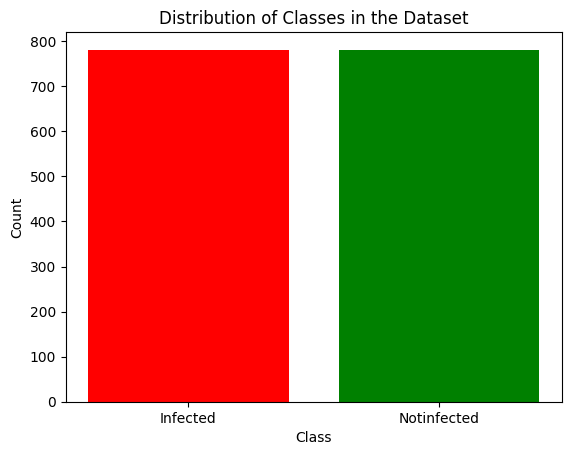

In [3]:
import os
import matplotlib.pyplot as plt

data_folder = 'data/train/'
infected_folder = os.path.join(data_folder, 'infected')
notinfected_folder = os.path.join(data_folder, 'notinfected')

class_labels = ['Infected', 'Notinfected']
class_counts = [len(os.listdir(infected_folder)), len(os.listdir(notinfected_folder))]

plt.bar(class_labels, class_counts, color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in the Dataset')
plt.show()



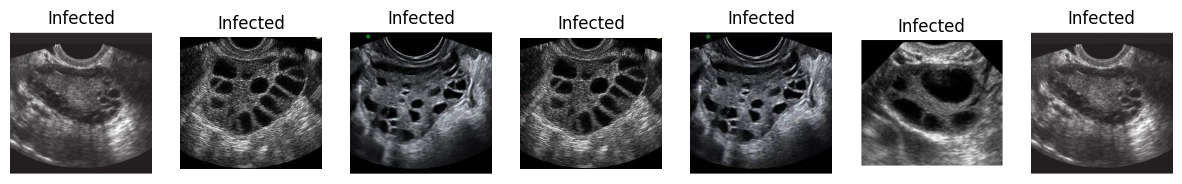

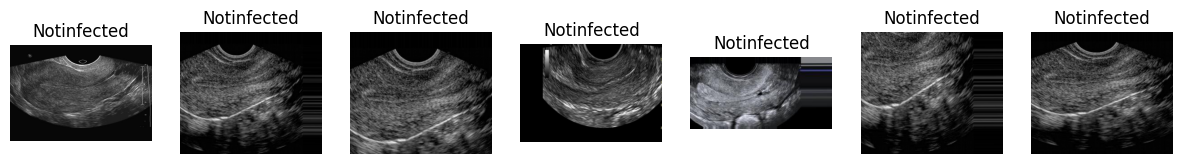

In [4]:
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_sample_images(folder, class_label, num_samples=7):
    images = [os.path.join(folder, filename) for filename in os.listdir(folder)[:num_samples]]
    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(images):
        plt.subplot(1, num_samples, i + 1)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(class_label)
        plt.axis('off')
    plt.show()

plot_sample_images(infected_folder, 'Infected')
plot_sample_images(notinfected_folder, 'Notinfected')


In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPooling2D((2, 2))) 
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Dropout(0.6))  

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dropout(0.6)) 

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2))

In [6]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    images,  
    labels,  
    epochs=30,  
    batch_size=32,  
    validation_split=0.2, 
    callbacks=[early_stopping] 
)

Epoch 1/30
40/40 [==============================] - 25s 633ms/step - loss: 8.8757e-06 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9968
Epoch 2/30
40/40 [==============================] - 24s 601ms/step - loss: 1.7722e-05 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9968
Epoch 3/30
40/40 [==============================] - 24s 600ms/step - loss: 4.6629e-06 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 0.9968
Epoch 4/30
40/40 [==============================] - 24s 601ms/step - loss: 4.3643e-06 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9968
Epoch 5/30
40/40 [==============================] - 24s 612ms/step - loss: 1.1754e-05 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9968
Epoch 6/30
40/40 [==============================] - 24s 609ms/step - loss: 5.9064e-06 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9968
Epoch 7/30
40/40 [==============================] - 24s 607ms/step - loss: 4.9255e-06 - accuracy: 1.0000 - val_loss: 0

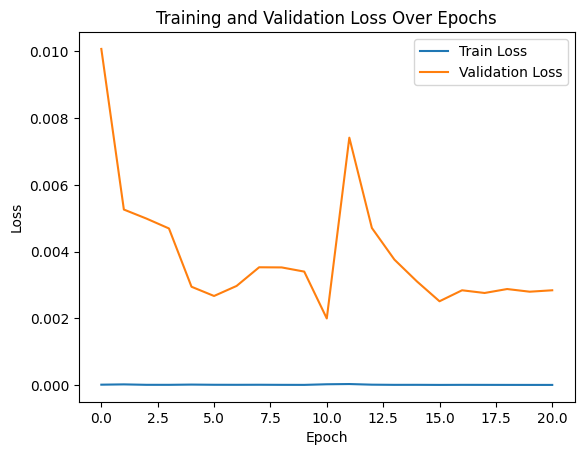

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.show()


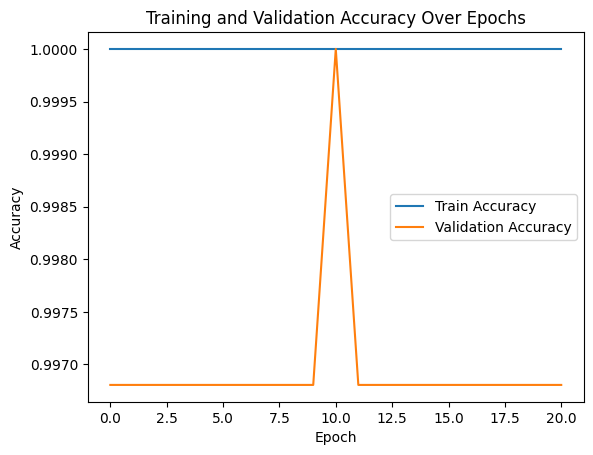

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()


In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def load_and_preprocess_image(file_path):
    img = Image.open(file_path)
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

def predict_class(model, image_path):
    test_image = load_and_preprocess_image(image_path)
    predictions = model.predict(test_image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class

def visualize_result(image_path, predicted_class):
    test_image = Image.open(image_path)
    plt.imshow(test_image)
    plt.title("Predicted Class: " + ("Not Infected" if predicted_class == 0 else "Infected"))
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 130ms/step


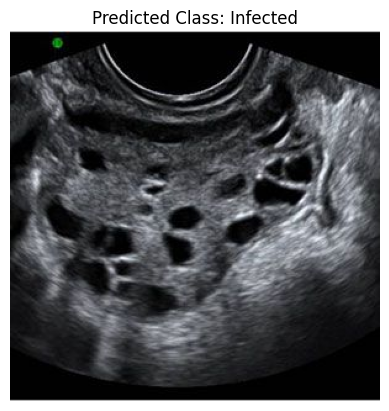

1/1 [==============================] - 0s 27ms/step


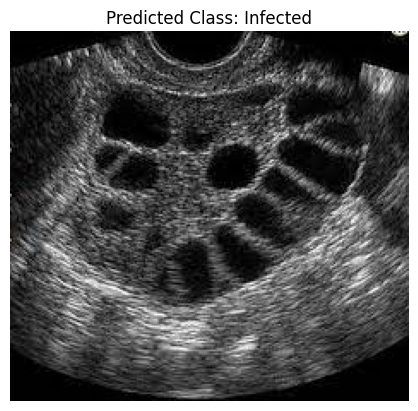

1/1 [==============================] - 0s 26ms/step


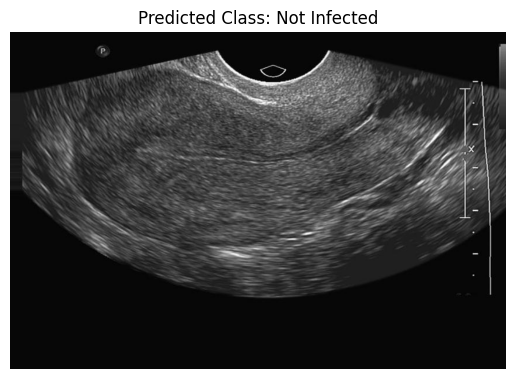

1/1 [==============================] - 0s 24ms/step


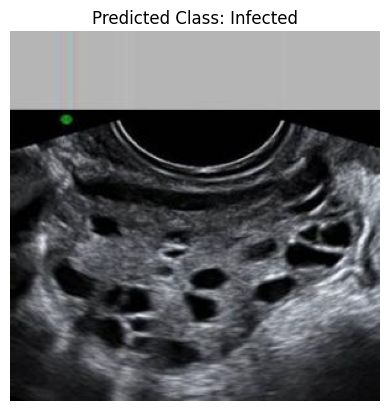

1/1 [==============================] - 0s 33ms/step


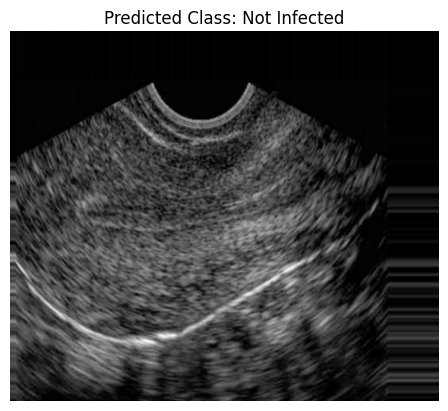

In [14]:
test_folder = 'data/test'
test_images = [os.path.join(test_folder, filename) for filename in os.listdir(test_folder) if filename.endswith(".jpg")]

random_test_images = random.sample(test_images, 5)

for test_image_path in random_test_images:
    predicted_class = predict_class(model, test_image_path)

    visualize_result(test_image_path, predicted_class)

1/1 [==============================] - 0s 19ms/step


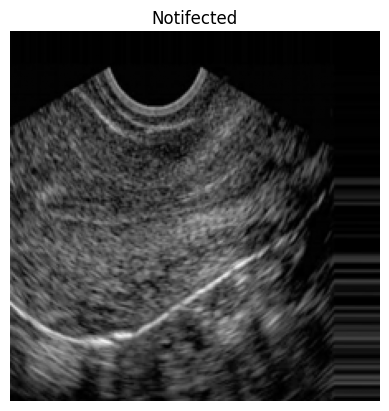

In [15]:


test_image = Image.open('data/test/img_0_99.jpg')  
test_image = test_image.resize((224, 224))  
test_image = np.array(test_image) / 255.0 


predictions = model.predict(np.expand_dims(test_image, axis=0))  

predicted_class = np.argmax(predictions, axis=1)

if predicted_class == 0:
    predict = "Notifected"
   
else:
   predict = "Infected"

plt.imshow(test_image)
plt.title( predict)
plt.axis('off')  
plt.show()


In [16]:
model.save('model.h5')
from keras.models import load_model

loaded_model = load_model('model.h5')

C:\Users\bayra\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
